# Liraries

In [27]:
# Other libraries
import os

# Dataproccesing 
import pandas as pd 
import numpy as np 

## Ploting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

## ML Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [28]:
train_df = pd.read_csv("train_data.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
test_df = pd.read_csv("test_data.csv")
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [30]:
print(f"train dataset(row, col): {train_df.shape}")
print(f"test dataset(row, col): {test_df.shape}")

train dataset(row, col): (614, 13)
test dataset(row, col): (367, 12)


In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [32]:
# Stats summary
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [33]:
# Lets remove the Loan_ID Column which is not required in any instance of this project
train_df.drop('Loan_ID',axis=1,inplace=True)
test_df.drop('Loan_ID',axis=1,inplace=True)

# Missing Values

Now each of the missing values will be replaced with the most frequent values of the columns which it belongs to (Mode)

Credit_History has 50 null values and has 2 unique values 1.0 (475 times) or 0.0 (89 times) therefore each null value will be replaced by the mode 1.0 so now it will show in our data 525 times.

In [34]:
train_df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
# Columns with null values 

null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']


# Filling the null values of the columns with the mode value

for col in null_cols:
    print(f"{col}:\n{train_df[col].value_counts()}\n","-"*50)
    train_df[col] = train_df[col].fillna(
    train_df[col].dropna().mode().values[0] )


# After filling the null values 

print(f"After filling null values\n",'#'*50)
train_df.isnull().sum().sort_values(ascending=False)

Credit_History:
1.0    475
0.0     89
Name: Credit_History, dtype: int64
 --------------------------------------------------
Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64
 --------------------------------------------------
LoanAmount:
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64
 --------------------------------------------------
Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
 --------------------------------------------------
Gender:
Male      489
Female    112
Name: Gender, dtype: int64
 --------------------------------------------------
Married:
Yes    398
No   

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [36]:
categorical_columns = train_df.select_dtypes('object').columns.to_list()

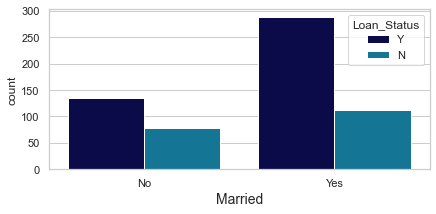

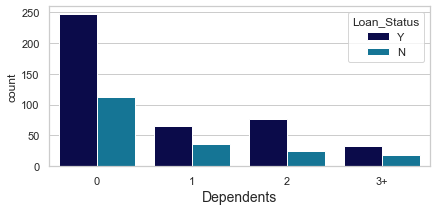

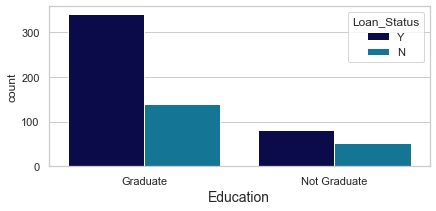

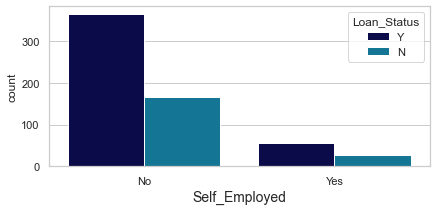

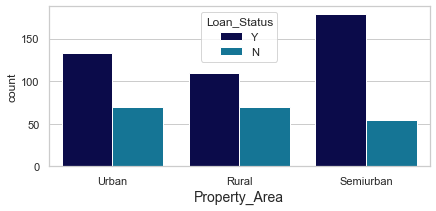

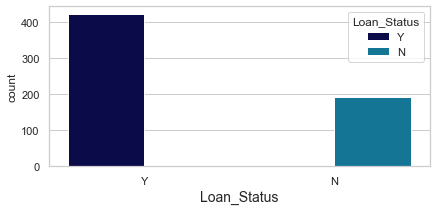

In [37]:
for i in categorical_columns[1:]: 
    plt.figure(figsize=(15,10))
    plt.subplot(3,2,1)
    sns.countplot(x=i ,hue='Loan_Status', data=train_df, palette='ocean')
    plt.xlabel(i, fontsize=14)

In [38]:
## Data Visualisation
# Numerical values 
num = train_df.select_dtypes('number').columns.to_list()

#Categorical values 
cat = train_df.select_dtypes('object').columns.to_list()

#Dataset 
loan_num = train_df[num]
loan_cat = train_df[cat]

Y    422
N    192
Name: Loan_Status, dtype: int64


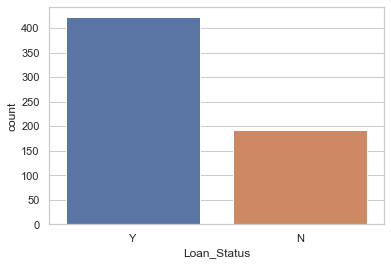

In [39]:
## Lets plot the Loan_Status columns first to know the propotion of accepted proposals and rejected ones 

print(train_df[cat[-1]].value_counts())

sns.set(style="whitegrid")
sns.countplot(x=train_df[cat[-1]])


plt.show()

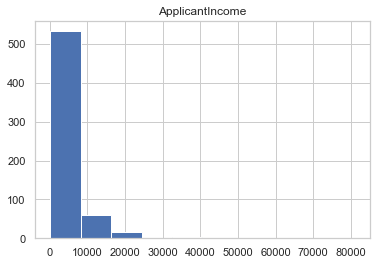

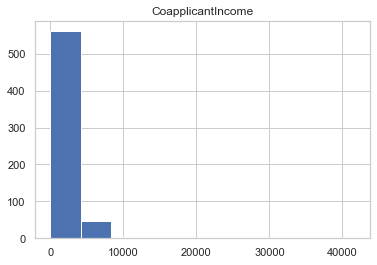

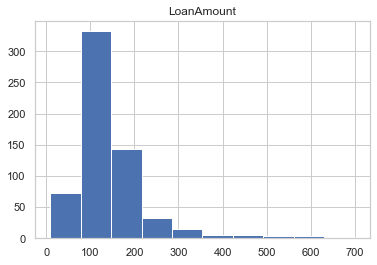

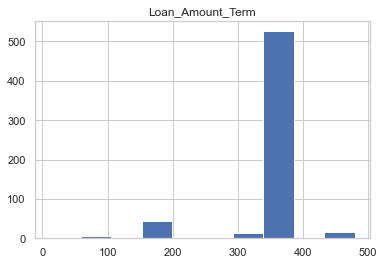

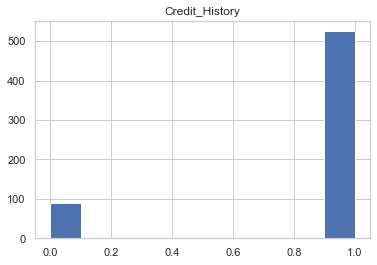

In [40]:
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

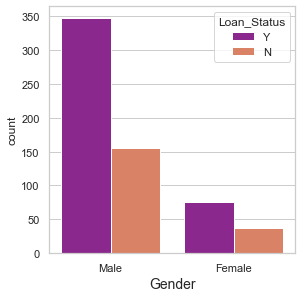

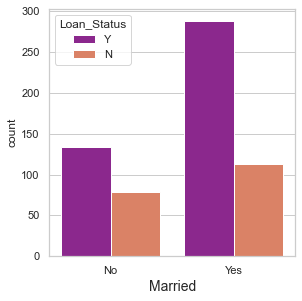

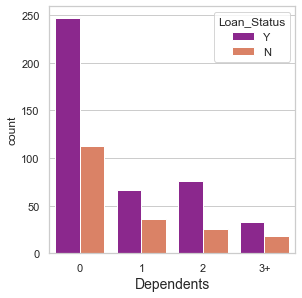

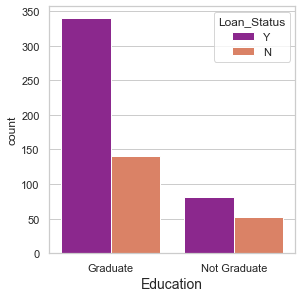

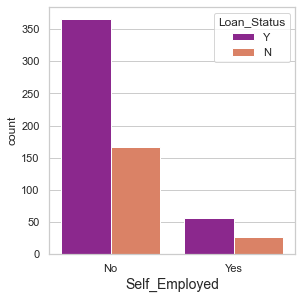

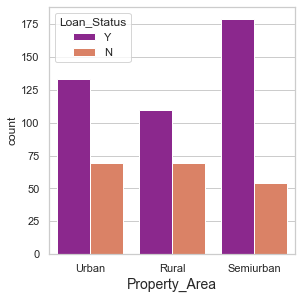

In [41]:
## Categorical Value Plots
for i in cat[:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=train_df ,palette='plasma')
    plt.xlabel(i, fontsize=14)

# Encoding Category values to Numeric values

In [42]:
# Looking at datatypes
train_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [43]:
# Categorical labels

to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

# adding the new numeric values from the to_numeric variable to both datasets
train_df = train_df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
test_df = test_df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)


# converting the Dependents column
Dependents_ = pd.to_numeric(train_df.Dependents)
Dependents__ = pd.to_numeric(test_df.Dependents)

# Droping previous dependent columns
train_df.drop(['Dependents'], axis = 1, inplace = True)
test_df.drop(['Dependents'], axis = 1, inplace = True)

# Concating new Dependents column with datasets

train_df = pd.concat([train_df, Dependents_], axis = 1)
test_df = pd.concat([test_df, Dependents__], axis = 1)


# Checking info of both datasets
print(train_df.info(), "\n\n", test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------        

# Correlation Matrix

<AxesSubplot:>

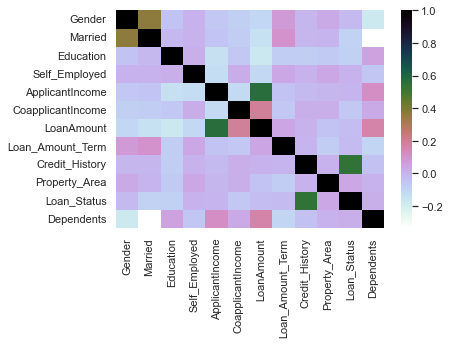

In [44]:
# Ploting the correaltion matrix
sns.heatmap(train_df.corr() ,cmap='cubehelix_r')

In [45]:
# Correlation table for better view
corr = train_df.corr()

corr.style.background_gradient(cmap="coolwarm")

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
Gender,1.000000,0.364569,-0.045364,-0.000525,-0.058809,-0.082912,-0.106404,0.074030,-0.009170,0.025752,-0.017987,-0.172914
Married,0.364569,1.000000,-0.012304,0.004489,-0.051708,-0.075948,-0.146212,0.100912,-0.010938,-0.004257,-0.091478,-0.334216
Education,-0.045364,-0.012304,1.000000,0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884,0.055752
Self_Employed,-0.000525,0.004489,0.010383,1.000000,-0.127180,0.016100,-0.114971,0.033739,0.001550,0.030860,0.003700,-0.056798
ApplicantIncome,-0.058809,-0.051708,-0.140760,-0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710,0.118202
CoapplicantIncome,-0.082912,-0.075948,-0.062290,0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187,0.030430
LoanAmount,-0.106404,-0.146212,-0.169436,-0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808,0.163017
Loan_Amount_Term,0.074030,0.100912,-0.073928,0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549,-0.103864
Credit_History,-0.009170,-0.010938,-0.073658,0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556,-0.040160
Property_Area,0.025752,-0.004257,-0.065243,0.030860,-0.009500,0.010522,-0.047414,-0.076120,0.001963,1.000000,0.032112,-0.000244


# Conclusion from Correlation Matrix:¶
 From the above two correlation matrix. We can see that Credit_History has a positive correation of 0.540556. So we can conclude that the target value(Loan_Status) is more depent on Credit_History

# Models we will use:
    Decision Tree
    Random Forest
    XGBoost
    Logistic Regression
    SVM

In [46]:
# Spliting the dataset
y = train_df['Loan_Status']
X = train_df.drop('Loan_Status', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

# Decision Tree

In [47]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

# Predicting the values
y_predict = DT.predict(X_test)


## Printing the classification report
print(classification_report(y_test,y_predict))

## Accuracy Score 
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")


## Results of the model
Decision_Tree = pd.DataFrame({'y_test':y_test, 'prediction':y_predict})
Decision_Tree.to_csv('Decision Tree.csv')

              precision    recall  f1-score   support

           0       0.47      0.53      0.50        51
           1       0.81      0.78      0.79       134

    accuracy                           0.71       185
   macro avg       0.64      0.65      0.65       185
weighted avg       0.72      0.71      0.71       185

70.81% Accurate


# Random Forest Classifier

In [48]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

# Prediciting the values
y_predict = RF.predict(X_test)

# Printing the classification report 
print(classification_report(y_test,y_predict))

## Accuracy Score 
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

## Results of the model
Random_Forest = pd.DataFrame({'y_test':y_test, 'prediction':y_predict})
Random_Forest.to_csv('Random Forest.csv')

              precision    recall  f1-score   support

           0       0.72      0.45      0.55        51
           1       0.82      0.93      0.87       134

    accuracy                           0.80       185
   macro avg       0.77      0.69      0.71       185
weighted avg       0.79      0.80      0.78       185

80.0% Accurate


# XGBoost

In [49]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

# Predicting the values
y_predict = XGB.predict(X_test)


## Printing the classification report
print(classification_report(y_test,y_predict))

## Accuracy Score 
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

## Results of the model
XGBoost = pd.DataFrame({'y_test':y_test, 'prediction':y_predict})
XGBoost.to_csv('XGBoost.csv')

              precision    recall  f1-score   support

           0       0.65      0.55      0.60        51
           1       0.84      0.89      0.86       134

    accuracy                           0.79       185
   macro avg       0.74      0.72      0.73       185
weighted avg       0.79      0.79      0.79       185

79.46% Accurate


# Logistic Regression

In [50]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

# Predicting the values
y_predict = LR.predict(X_test)


## Printing the classification report
print(classification_report(y_test,y_predict))

## Accuracy Score 
LR_SC = accuracy_score(y_predict,y_test)
print(f"{round(LR_SC*100,2)}% Accurate")

## Results of the model
Logisitic_Regression = pd.DataFrame({'y_test':y_test, 'prediction':y_predict})
Logisitic_Regression.to_csv('Logisitic Regression.csv')

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185

83.24% Accurate


C:\Users\Ramesh kumar\anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVM

In [51]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train, y_train)

# Predicting the values
y_predict = sv.predict(X_test)


## Printing the classification report
print(classification_report(y_test,y_predict))

## Accuracy Score 
sv_SC = accuracy_score(y_predict,y_test)
print(f"{round(sv_SC*100,2)}% Accurate")

## Results of the model
SVM = pd.DataFrame({'y_test':y_test, 'prediction':y_predict})
SVM.to_csv('SVM.csv')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.72      1.00      0.84       134

    accuracy                           0.72       185
   macro avg       0.36      0.50      0.42       185
weighted avg       0.52      0.72      0.61       185

72.43% Accurate


C:\Users\Ramesh kumar\anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramesh kumar\anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramesh kumar\anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Conclusion  

1.Credit_History is the variable that impacts the Loan_Status variable (Higher Dependencies)

2.The Logisitic Regression Model is the most accurate model : 83.24% Accurate

In [52]:
# Scores from all 5 models
scores = [DT_SC,RF_SC,XGB_SC,LR_SC,sv_SC]

models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression", "SVM"],
    'Score': scores
})

models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
3,Logistic Regression,0.832432
1,Random Forest,0.800000
2,XGBoost,0.794595
4,SVM,0.724324
0,Decision Tree,0.708108
